<a href="https://colab.research.google.com/github/Kishore-C-Dev/ML-AI/blob/main/ML/tensorflow_multi_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
fashion_minst=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_minst.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_images[0].shape,train_labels[0].shape


((28, 28), ())

(<matplotlib.image.AxesImage at 0x7d940258d480>, 2)

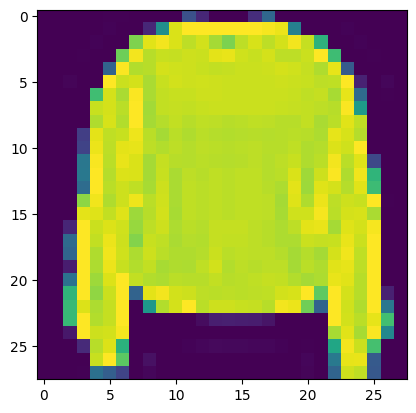

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[7]),train_labels[7]

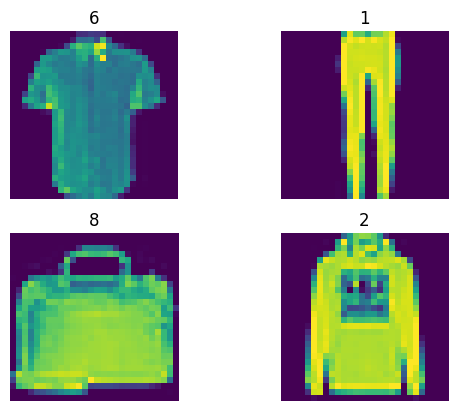

In [ ]:
import random
import numpy as np
for i in range(4) :
  plt.subplot(2,2,i+1)
  j=np.random.randint(len(train_images))
  plt.imshow(train_images[j])
  plt.title(train_labels[j])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])



In [ ]:
train_images.ndim,train_labels.ndim

(3, 1)

In [ ]:
history=model.fit(tf.expand_dims(train_images,axis=-1),train_labels,epochs=25,validation_data=(tf.expand_dims(test_images,axis=-1),test_labels))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1264 - loss: 3.3010 - val_accuracy: 0.2431 - val_loss: 1.8190
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2423 - loss: 1.7822 - val_accuracy: 0.2278 - val_loss: 1.7294
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2512 - loss: 1.7091 - val_accuracy: 0.2753 - val_loss: 1.6672
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2578 - loss: 1.6839 - val_accuracy: 0.2607 - val_loss: 1.7181
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2583 - loss: 1.6730 - val_accuracy: 0.2668 - val_loss: 1.6640
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2579 - loss: 1.6675 - val_accuracy: 0.2599 - val_loss: 1.6535
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2700 - loss: 1.6544 - val_accuracy: 0.2805 - val_loss: 1.6350
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2796 - loss: 1.6468 - 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
test_images.ndim,test_images.max()

(3, 255)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_images_scaled=scaler.fit_transform(train_images.reshape(train_images.shape[0],-1))
test_images_scaled=scaler.fit_transform(test_images.reshape(test_images.shape[0],-1))
train_images_scaled.max(),train_images_scaled.min()


(1.0, 0.0)

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential()
model2.add(tf.keras.Input(shape=[28,28]))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(4,activation='relu'))
model2.add(tf.keras.layers.Dense(4,activation='relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history2=model2.fit(tf.expand_dims(train_images_scaled,axis=-1),train_labels,epochs=10,validation_data=(tf.expand_dims(test_images_scaled,axis=-1),test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7482 - loss: 0.7710 - val_accuracy: 0.7721 - val_loss: 0.6948
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7814 - loss: 0.6636 - val_accuracy: 0.7858 - val_loss: 0.6510
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7922 - loss: 0.6212 - val_accuracy: 0.7949 - val_loss: 0.6244
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8006 - loss: 0.5940 - val_accuracy: 0.7991 - val_loss: 0.6053
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8060 - loss: 0.5749 - val_accuracy: 0.8029 - val_loss: 0.5948
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8099 - loss: 0.5612 - val_accuracy: 0.8054 - val_loss: 0.5867
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8137 - loss: 0.5507 - val_accuracy: 0.8078 - val_loss: 0.5810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8157 - loss: 0.5428 - 

Text(0.5, 0, 'epochs')

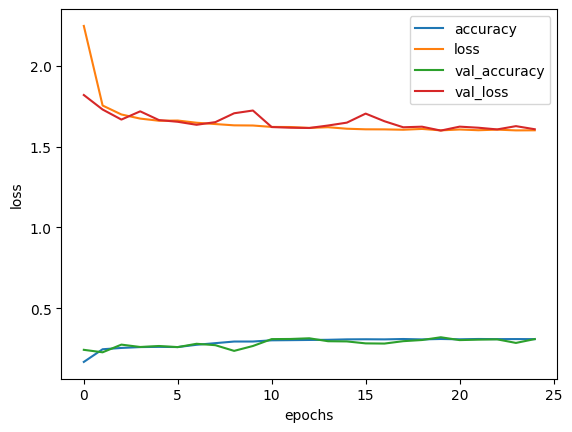

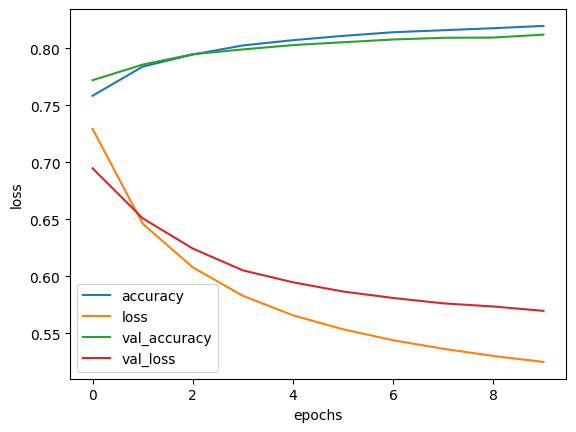

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
tf.random.set_seed(42)
model3=tf.keras.Sequential()
model3.add(tf.keras.Input(shape=[28,28]))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(4,activation='relu'))
model3.add(tf.keras.layers.Dense(4,activation='relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
learning_rate_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
lr_history=model3.fit(tf.expand_dims(train_images_scaled,axis=-1),train_labels,epochs=20,validation_data=(tf.expand_dims(test_images_scaled,axis=-1),test_labels),callbacks=[learning_rate_scheduler])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3363 - loss: 1.7464 - val_accuracy: 0.5984 - val_loss: 1.1029 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6449 - loss: 0.9718 - val_accuracy: 0.7085 - val_loss: 0.7770 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7226 - loss: 0.7345 - val_accuracy: 0.7166 - val_loss: 0.7191 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7295 - loss: 0.6893 - val_accuracy: 0.7251 - val_loss: 0.6955 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7355 - loss: 0.6705 - val_accuracy: 0.7279 - val_loss: 0.6853 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7379 - loss: 0.6594 - val_accuracy: 0.7291 - val_loss: 0.6788 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7446 - l

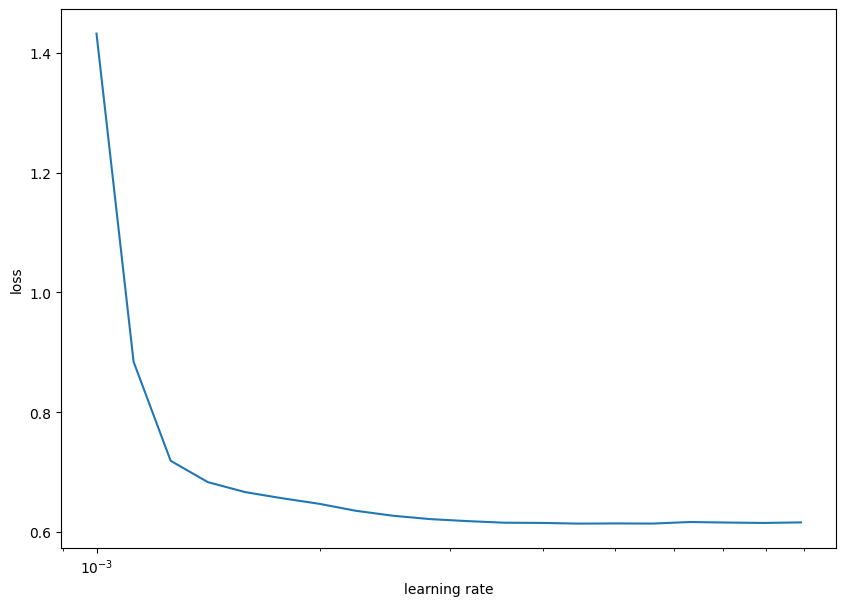

In [ ]:
lrs=1e-3*(10**(tf.range(20)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

In [ ]:
tf.random.set_seed(42)
model4=tf.keras.Sequential()
model4.add(tf.keras.Input(shape=[28,28]))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(4,activation='relu'))
model4.add(tf.keras.layers.Dense(4,activation='relu'))
model4.add(tf.keras.layers.Dense(10,activation='softmax'))
model4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
ideal_lr_history=model4.fit(tf.expand_dims(train_images_scaled,axis=-1),train_labels,epochs=20,validation_data=(tf.expand_dims(test_images_scaled,axis=-1),test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3082 - loss: 1.8255 - val_accuracy: 0.6149 - val_loss: 1.1241
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6572 - loss: 1.0076 - val_accuracy: 0.7085 - val_loss: 0.8133
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7231 - loss: 0.7869 - val_accuracy: 0.7286 - val_loss: 0.7426
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7429 - loss: 0.7238 - val_accuracy: 0.7364 - val_loss: 0.7135
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7505 - loss: 0.6939 - val_accuracy: 0.7429 - val_loss: 0.7019
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7578 - loss: 0.6741 - val_accuracy: 0.7499 - val_loss: 0.6895
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7624 - loss: 0.6588 - val_accuracy: 0.7539 - val_loss: 0.6787
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7685 - loss: 0.6467 - 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model4.predict(tf.expand_dims(test_images_scaled,axis=-1))
y_pred[0]





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.2947402e-13, 2.4327850e-08, 3.8776785e-19, 6.1515749e-08,
       1.0870631e-15, 1.5984142e-02, 4.2476263e-15, 1.4527582e-01,
       2.8649214e-07, 8.3873969e-01], dtype=float32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred=tf.argmax(y_pred,axis=1)
y_pred[:10]


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 2, 4, 5, 7])>

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


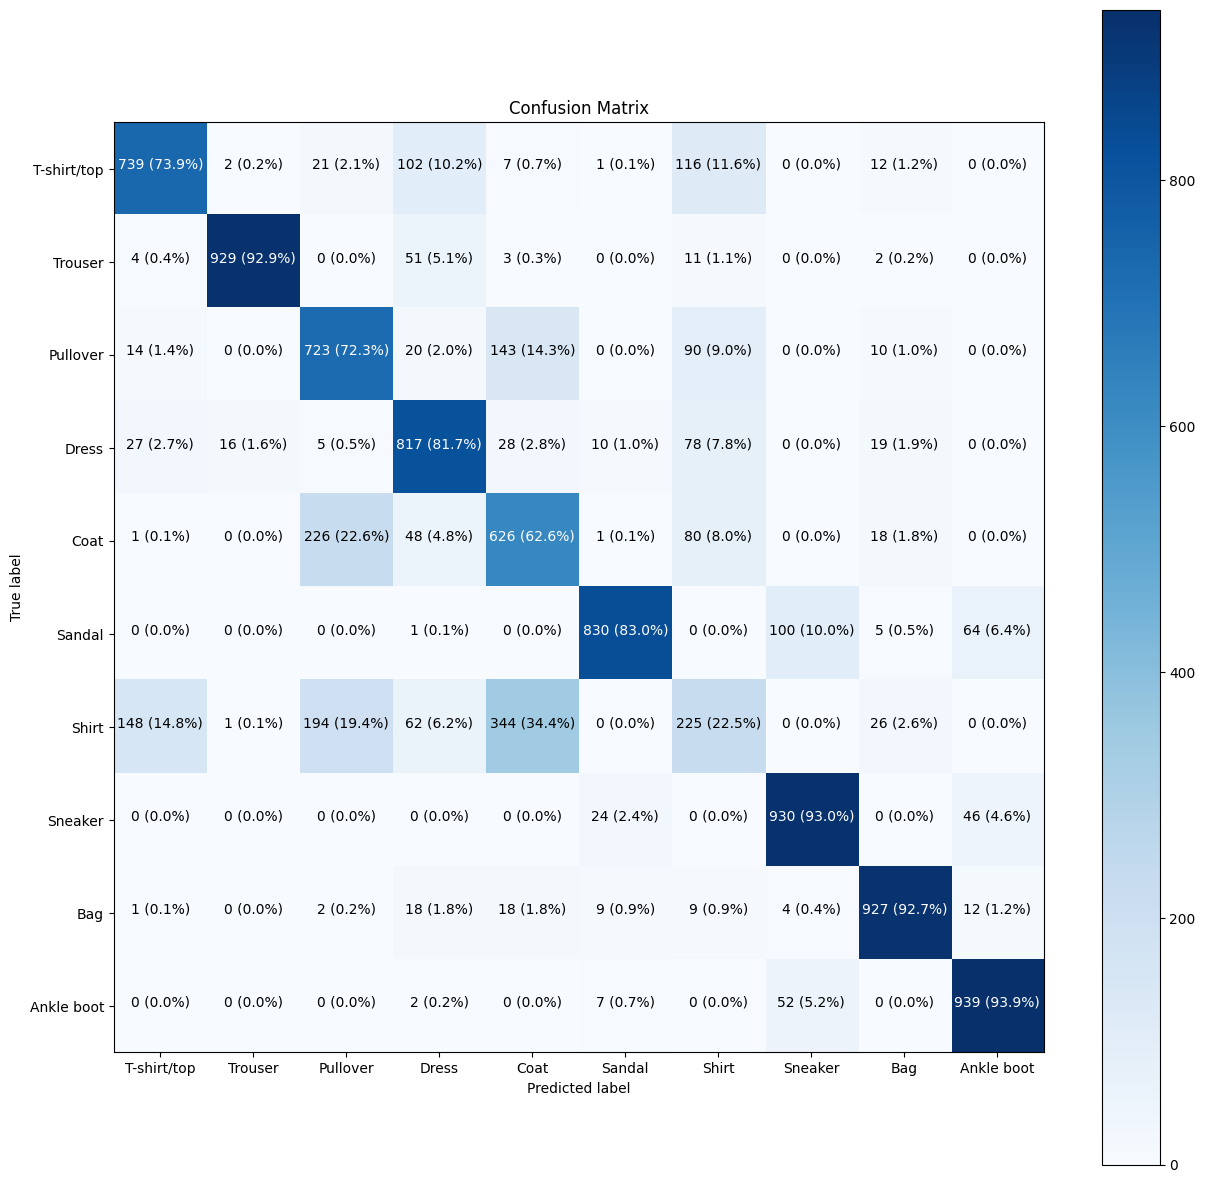

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
test_images[0].shape

(28, 28)

In [ ]:
def plot_random_images(model,images,true_labels,classes) :
    rand=np.random.randint(0,len(images))
    test_image=images[rand]
    predict_probs=model.predict(test_image.reshape(1,28,28))
    pred_label=classes[predict_probs.argmax()]
    true_label=classes[true_labels[rand]]
    plt.imshow(test_image,cmap=plt.cm.binary)
    if pred_label==true_label :
        plt.title(f'{pred_label}',color='green')
    else :
        plt.title(f'{pred_label}',color='red')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


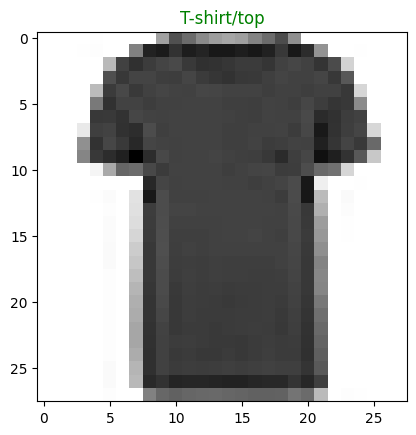

In [ ]:
plot_random_images(model4,test_images,test_labels,class_names)

In [ ]:
model4.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
weights,biases=model4.layers[1].get_weights()
weights,weights.shape

(array([[ 0.8751644 ,  0.2385587 , -0.04493237,  0.68824637],
        [ 1.6808225 , -0.01157389,  0.903616  ,  0.8904618 ],
        [ 0.79420215, -0.36291623,  0.74576986,  1.4220929 ],
        ...,
        [-0.14574468,  0.31992006, -0.20644437,  0.4612413 ],
        [ 0.09944405,  0.27737388,  0.33466208, -0.01538435],
        [ 0.35550493,  0.66053337, -1.2499084 , -0.60204285]],
       dtype=float32),
 (784, 4))

In [ ]:
biases,biases.shape

(array([3.153004 , 1.4719375, 3.3681848, 2.6110847], dtype=float32), (4,))

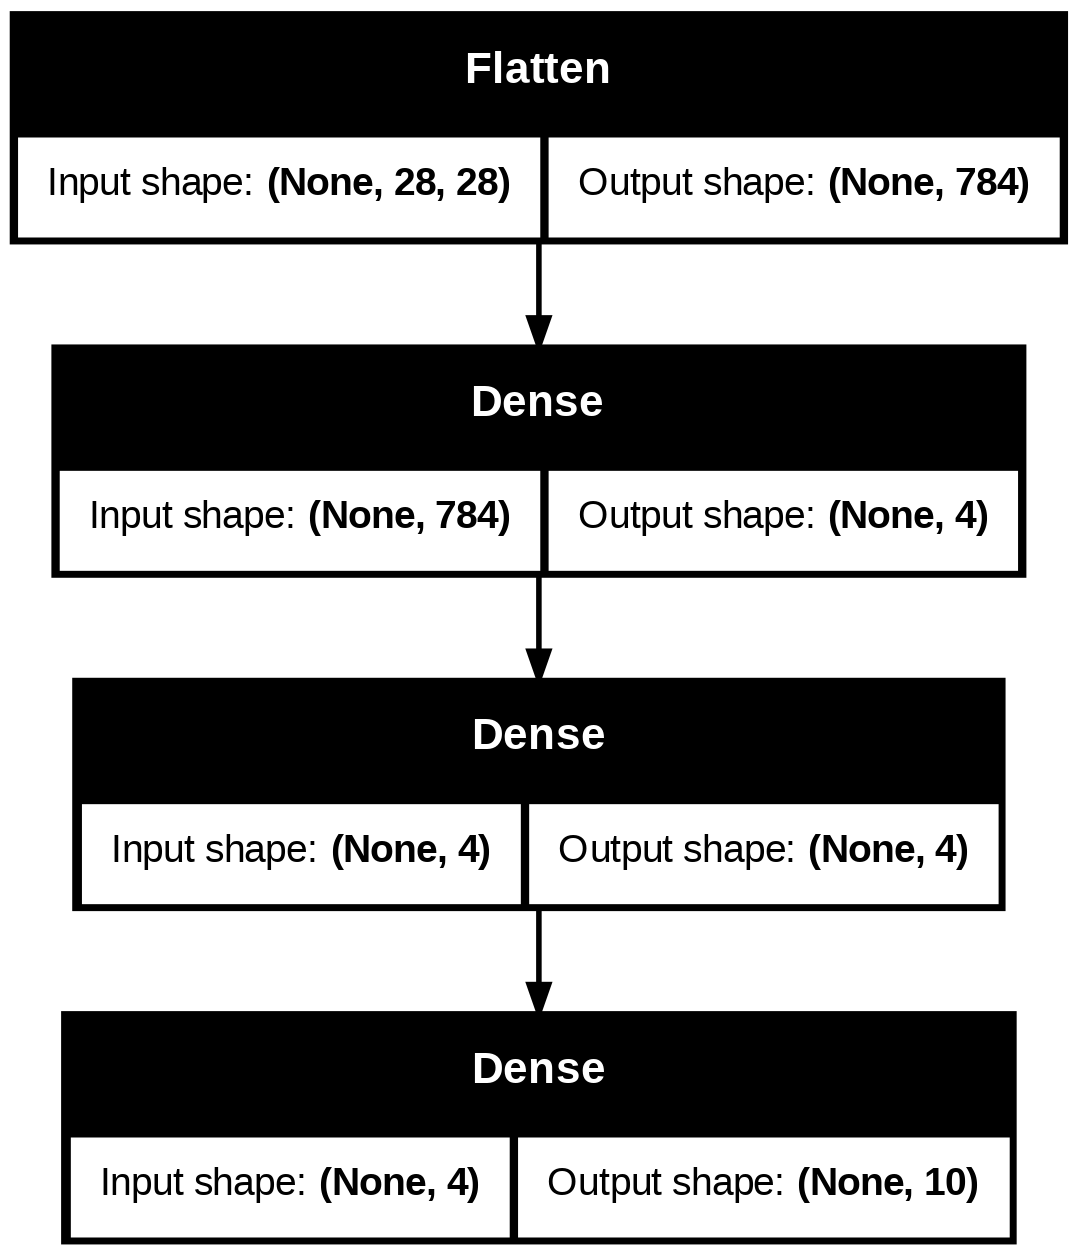

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model4,show_shapes=True)